In [10]:
#https://www.cnblogs.com/silence-cho/p/13621975.html
#coding:utf-8

import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 

# 二维高斯卷积核拆分为水平核垂直一维卷积核，分别进行卷积
def gaussConv(image, size, sigma):
    H, W = size
    # 先水平一维高斯核卷积
    xr, xc = np.mgrid[0:1, 0:W]
    xc = xc.astype(np.float32)
    xc -= (W-1.0)/2.0
    xk = np.exp(-np.power(xc, 2.0)/(2*sigma*sigma))
    image_xk = signal.convolve2d(image, xk, 'same', 'symm')

    # 垂直一维高斯核卷积
    yr, yc = np.mgrid[0:H, 0:1]
    yr = yr.astype(np.float32)
    yr -= (H-1.0)/2.0
    yk = np.exp(-np.power(yr, 2.0)/(2*sigma*sigma))
    image_yk = signal.convolve2d(image_xk, yk, 'same','symm')
    image_conv = image_yk/(2*np.pi*np.power(sigma, 2.0))

    return image_conv

def DoG(image, size, sigma, k=1.1):
    Is = gaussConv(image, size, sigma)
    Isk = gaussConv(image, size, sigma*k)
    doG = Isk - Is
    doG /= (np.power(sigma, 2.0)*(k-1))
    return doG

def zero_cross_default(doG):
    zero_cross = np.zeros(doG.shape, np.uint8);
    rows, cols = doG.shape
    for r in range(1, rows-1):
        for c in range(1, cols-1):
            if doG[r][c-1]*doG[r][c+1] < 0:
                zero_cross[r][c]=255
                continue
            if doG[r-1][c] * doG[r+1][c] <0:
                zero_cross[r][c] = 255
                continue
            if doG[r-1][c-1] * doG[r+1][c+1] <0:
                zero_cross[r][c] = 255
                continue
            if doG[r-1][c+1] * doG[r+1][c-1] <0:
                zero_cross[r][c] = 255
                continue
    return zero_cross

def Marr_Hildreth(image, size, sigma, k=1.1):
    doG = DoG(image, size, sigma, k)
    zero_cross = zero_cross_default(doG)

    return zero_cross

if __name__ == "__main__":
    img_path= r"Car On Mountain Road.tif"
    img = cv2.imread(img_path, 0)
    k = 1.1
    marri_edge = Marr_Hildreth(img, (11, 11), 1, k)
    marri_edge2 = Marr_Hildreth(img, (11, 11), 2, k)
    marri_edge3 = Marr_Hildreth(img, (7, 7), 1, k)

    

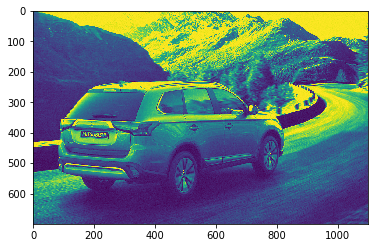

In [11]:
    plt.imshow(img)
    
    
    
    
    #cv2.imshow("img", img)
    #cv2.imshow("marri_edge", marri_edge)
    #cv2.imshow("marri_edge2", marri_edge2)
    #cv2.imshow("marri_edge3", marri_edge3)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

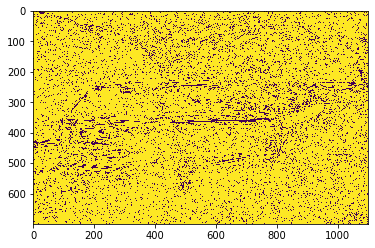

In [12]:
plt.imshow(marri_edge)

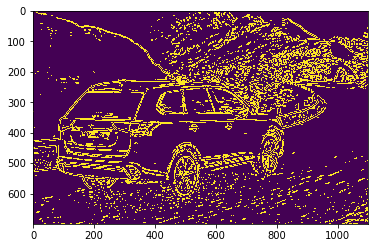

In [13]:
plt.imshow(marri_edge2)

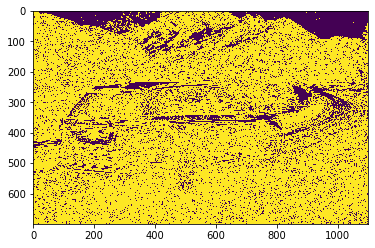

In [14]:
plt.imshow(marri_edge3)